# Quantium Data Analytics Virtual Experience Program
## Task 1: Data Preparation and Customer Analytics

### Background
You are a member of Quantium's retail analytics team, and your client, Julia, the Category Manager for Chips, needs your expertise to better understand customer purchasing behaviors and inform the supermarket's strategic plan for the chip category.

### Objective
Analyze the transaction dataset to identify customer segments and their chip purchasing behaviors, providing data-driven insights and commercial recommendations for Julia's category review.

### Task
#### Data Checks
* Create and interpret summaries of the data
* Identify and remove outliers (if applicable)
* Check and correct data formats (if applicable)

#### Derive Extra Features
* Pack size
* Brand name

#### Define Metrics of Interest
* Who spends on chips
* What drives spending for each customer segment

### Key Customer Attributes
* **LIFESTAGE**: Identifies customers' life stages (e.g., family size, children's ages)
* **PREMIUM_CUSTOMER**: Segments customers by price point and product type preferences (quality/brand vs. cheapest options)

### Deliverable
Provide a strategic recommendation to Julia, supported by data insights, to inform the chip category strategy for the next half year. Ensure your insights have commercial applications.

In [10]:
#   Importing the necessary libraries/modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# import xlrd
%matplotlib inline

#   Ignoring any warnings.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [11]:
transaction_data=pd.read_csv("QVI_transaction_data.csv") #   Reading the Excel Workbook file into a pandas.DataFrame.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [12]:
transaction_data.info() #   Getting a concise summary of the pandas.DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
transaction_data.isnull().sum() #   Checking for any null values in the pandas.DataFrame.

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

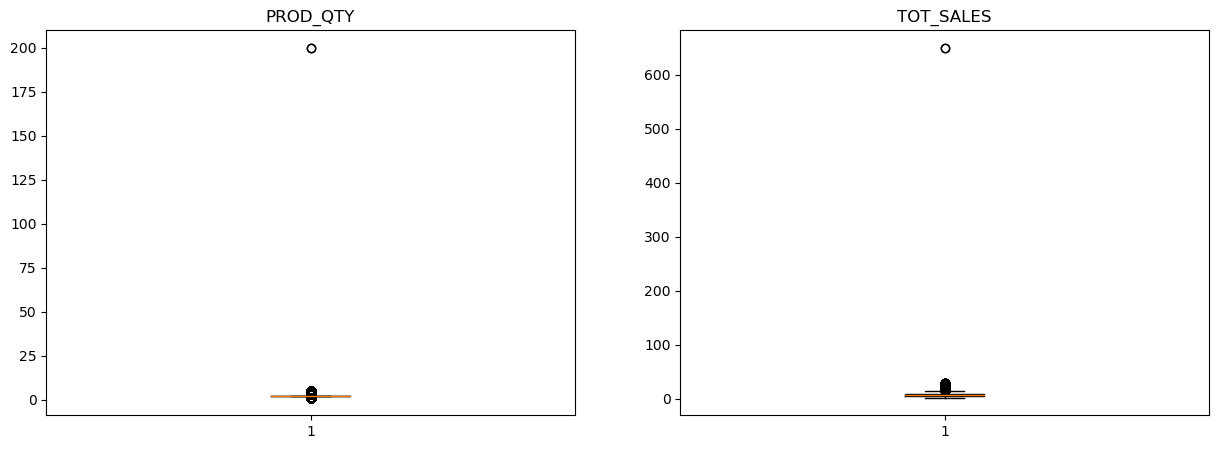

In [14]:
#   Checking for any outliers in the pandas.DataFrame using a box plot of the PROD_QTY and TOT_SALES column.

figure, axis=plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

In [15]:
#   Removing the outliers from the pandas.DataFrame.

transaction_data=transaction_data[transaction_data["PROD_QTY"]<100]
transaction_data=transaction_data[transaction_data["TOT_SALES"]<500]
transaction_data=transaction_data.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


As we can see, removing the outliers decreased the pandas.DataFrame down two rows. Of course, this isn't a significant difference, but removing these outliers may allow us to get slightly more accurate analysis results.

Unfortunately, we can also see that the DATE column in the dataset is in the Microsoft Excel serial time format, which is the number of days since the number of days since 1st Janurary 1900, so it's better to convert it to the appropriate datetime format that's more familiar to us.

In [16]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], unit="D", origin="1899-12-30")

In [17]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [18]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")    #   Reading the CSV file into a pandas.DataFrame.
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [19]:
purchase_behaviour.info()  #   Getting a concise summary of the pandas.DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
purchase_behaviour.isnull().sum()   #   Checking for any null values in the pandas.DataFrame.

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [21]:
dataframe=pd.merge(transaction_data, purchase_behaviour, on="LYLTY_CARD_NBR")   #   Merging the two pandas.DataFrames into one on the basis of the LYLTY_CARD_NBR column.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [22]:
unique_products=list(dataframe["PROD_NAME"].unique())   #   Storing the distinct products from the pandas.DataFrame into a list.
print("Total Distinct Products:", len(unique_products))

Total Distinct Products: 114


In [23]:
dataframe["PROD_NAME_CLEAN"]=dataframe["PROD_NAME"].str.replace("\d+g", "") #   Removing the package sizes from the product names, and storing them in a separate column.
dataframe["PROD_SIZE"]=dataframe["PROD_NAME"].str.extract("(\d+)")    #   Extracting the package sizes from the product names, and storing them in a separate column. 
dataframe["PROD_NAME"]=dataframe["PROD_NAME_CLEAN"] #   Assigning the PROD_NAME_CLEAN column to the PROD_NAME column.
dataframe=dataframe.drop("PROD_NAME_CLEAN", axis=1) #   Dropping the PROD_NAME_CLEAN column from the pandas.DataFrame.
dataframe["BRAND_NAME"]=dataframe["PROD_NAME"].str.split().str[0]    #   Extracting the brand names from the product names, and storing them in a separate column.
dataframe=dataframe.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]]   #   Rearranging the columns of the pandas.DataFrame.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,175,Kettle,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,175,Tostitos,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,170,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,150,Doritos,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [24]:
dataframe.isnull().sum()   #   Checking for any null values in the pandas.DataFrame.

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_SIZE           0
BRAND_NAME          0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [25]:
dataframe=dataframe.sort_values(by="DATE")  #   Sorting the pandas.DataFrame in ascending order of the DATE column.
dataframe=dataframe.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,24,24109,20881,54,CCs Original 175g,175,CCs,2,4.2,YOUNG FAMILIES,Mainstream
1,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion170g,170,Smiths,2,5.8,YOUNG FAMILIES,Budget
2,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,170,Doritos,2,8.8,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,300,Old,2,10.2,YOUNG FAMILIES,Premium
4,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,150,Kettle,2,9.2,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,26,26054,22482,34,Pringles Slt Vingar 134g,134,Pringles,2,7.4,RETIREES,Mainstream
264830,2019-06-30,201,201371,201571,36,Kettle Chilli 175g,175,Kettle,2,10.8,OLDER FAMILIES,Premium
264831,2019-06-30,222,222089,222019,114,Kettle Sensations Siracha Lime 150g,150,Kettle,2,9.2,OLDER FAMILIES,Budget
264832,2019-06-30,230,230102,232603,52,Grain Waves Sour Cream&Chives 210G,210,Grain,2,7.2,OLDER SINGLES/COUPLES,Premium


Now that we have the pandas.DataFrame sorted according to the date, we can analyse the dataset with regards to the change over time. However, before we can do that, we need to make sure that the DATE column contains no missing values for unrecorded dates.

In [26]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(dataframe["DATE"])   #   Checking for any missing dates in the pandas.DataFrame.

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

As suspected, there is one unrecorded date and that's for Christmas Day, since most stores are closed during that time. Hence, we can fill in the value for this as having zero sales on the date.

In [28]:
#   Adding an entry for the missing date in the pandas.DataFrame.

dataframe.loc[len(dataframe)] = [pd.to_datetime("2018-12-25"), 0, 0, 0, 0, "None", "None", "0g", 0, 0, "None", "None"]
dataframe = dataframe.sort_values(by="DATE")
dataframe = dataframe.reset_index(drop=True)

In [29]:
dataframe.loc[dataframe["DATE"]=="2018-12-25"]  #   Checking if the missing date has been added to the pandas.DataFrame.


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
129324,2018-12-25,0,0,0,0,None,None,0g,0,0.0,None,None


With our missing date sorted, let's start by visualising the change in total sales over the entire recorded duration.

In [30]:
date_sales=dataframe.groupby("DATE")["TOT_SALES"].sum().reset_index()   #   Grouping the pandas.DataFrame by the TOT_SALES column for each recorded date.
date_sales

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


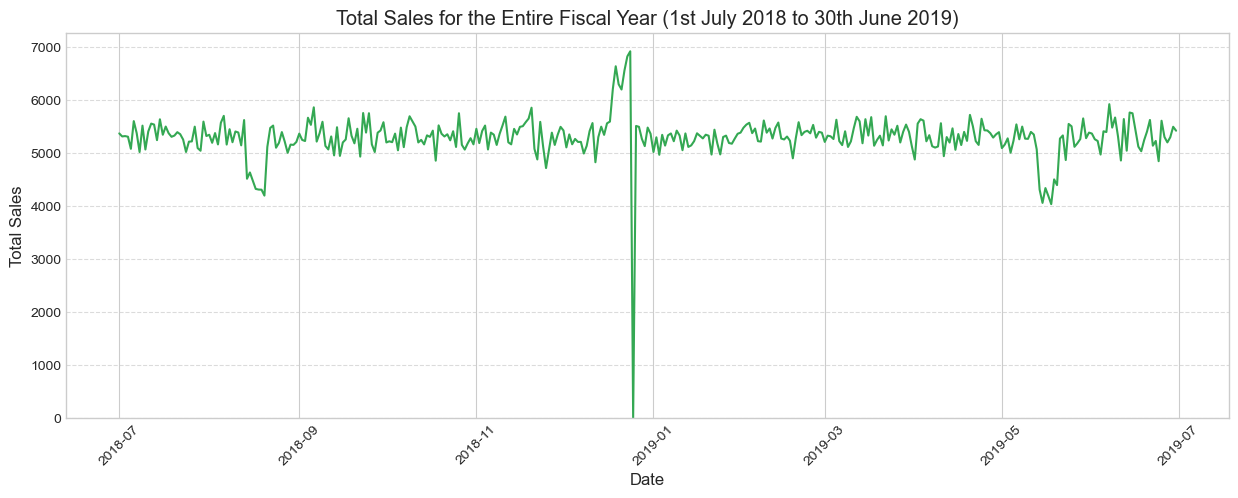

In [71]:
#   Plotting a line graph of the total sales for each date over the entire recorded duration.

import seaborn as sns

plt.figure(figsize=(15, 5))
sns.lineplot(x="DATE", y="TOT_SALES", data=date_sales, color="#34A853")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
sns.set_style("whitegrid")  # Use seaborn's API to set the style
plt.show()

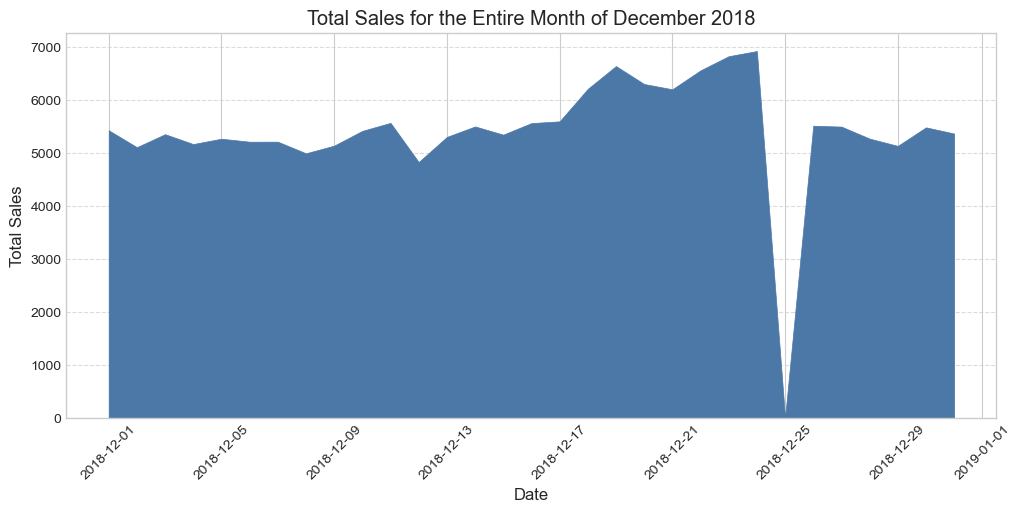

In [74]:
#   Plotting a line graph of the total sales for each recorded date during December 2018.

plt.figure(figsize=(12, 5))
plt.fill_between(date_sales["DATE"][date_sales["DATE"].dt.month==12], date_sales["TOT_SALES"][date_sales["DATE"].dt.month==12], color="#4c78a8")
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.show()

As suspected, the sales reached an all-time high the day before Christmas Day, which makes sense because people tend to purchase food items more when approaching holiday season. We can also see a consistent rise in the line graph between 21st December and 24th December, which means that these are the dates the store could target with promotions and discounts to increase the sales even more.

If the store does want to target these dates, it would be important to know which package sizes sell the most to create promotions and discounts around them.

In [33]:
holiday_sales=dataframe[(dataframe["DATE"]>="2018-12-21") & (dataframe["DATE"]<="2018-12-24")]  #   Extracting entries for the dates between 21st December 2018 and 24th December 2018.
holiday_sales=holiday_sales.sort_values(by="TOT_SALES") #   Sorting the pandas.DataFrame in ascending order of the TOT_SALES column.
holiday_sales=holiday_sales.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
holiday_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-12-22,127,127448,130458,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Mainstream
1,2018-12-24,38,38005,34012,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Budget
2,2018-12-23,255,255077,254619,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,YOUNG FAMILIES,Budget
3,2018-12-22,186,186218,188613,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,RETIREES,Mainstream
4,2018-12-22,136,136114,138499,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2018-12-24,217,217332,217772,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,YOUNG FAMILIES,Mainstream
3609,2018-12-22,237,237075,240397,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,YOUNG FAMILIES,Premium
3610,2018-12-24,231,231128,234222,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER SINGLES/COUPLES,Budget
3611,2018-12-22,54,54377,48429,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,YOUNG SINGLES/COUPLES,Budget


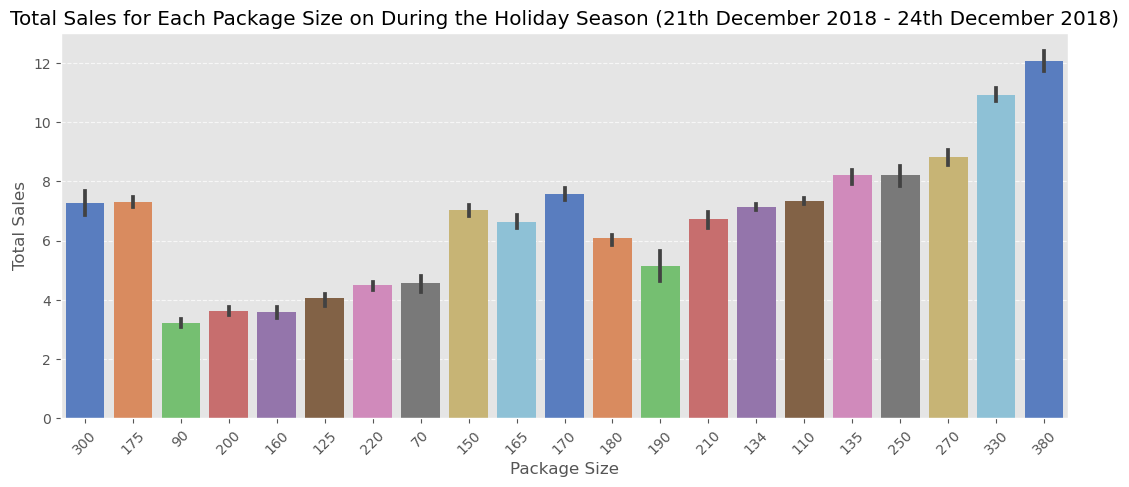

In [69]:
#   Plotting a bar graph of the total sales for each package size between 21st December 2018 and 24th December 2018.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales, palette="muted")
plt.title("Total Sales for Each Package Size on During the Holiday Season (21th December 2018 - 24th December 2018)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.style.use('ggplot')
plt.show()

It seems like customers mostly purchased the 380 gramme package size (the largest one in the store) when approaching the holiday season.

Additionally, we can also find the brands that sold the most during the particular dates for brand-specific campaigns.

In [36]:
holiday_brands=holiday_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)    #   Grouping the pandas.DataFrame by the TOT_SALES column for each brand, and sorting it in descending order of the TOT_SALES column.
holiday_brands=holiday_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
holiday_brands

,BRAND_NAME,TOT_SALES
0,Kettle,4940.0
1,Doritos,2948.5
2,Smiths,2914.5
3,Pringles,2290.3
4,Thins,1343.1


We can see that KETTLE® was the highest-selling brand during the holiday season, so it'd be wise to surround promotions and discounts around it to drive sales even more.

Let's see if our holiday season statistics match with the ones during the entire duration of the recorded sales.

In [37]:
package_sales=dataframe.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   #   Grouping the pandas.DataFrame by the TOT_SALES column for each package size, and sorting it in descending order of the TOT_SALES column.
package_sales=package_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
package_sales

,PROD_SIZE,TOT_SALES
0,175,485437.4
1,150,304288.5
2,134,177655.5
3,110,162765.4
4,170,146673.0
5,330,136794.3
6,300,113330.6
7,165,101360.6
8,380,75419.6
9,270,55425.4


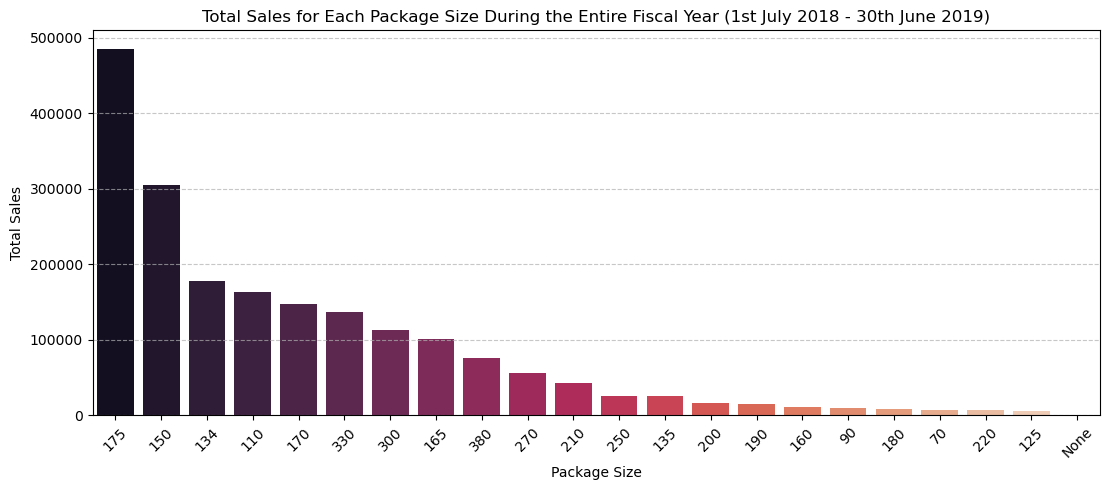

In [64]:
#   Plotting a bar graph of the total sales for each package size during the entire recorded duration.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales, palette="rocket")
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.show()

As we can see, the 175 gramme package size was the highest-selling one over the entire duration of the recorded sales, and even that by nearly 37% from the second highest-selling package size. Hence, it's clear that the 175 gramme package size is a customer favourite!

Likewise, we can also check for the highest-selling brands during the entire duration of the recorded sales.

In [39]:
brands_sales=dataframe.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)  #   Grouping the pandas.DataFrame by the TOT_SALES column for the top five brands, and sorting it in descending order of the TOT_SALES column.
brands_sales=brands_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
brands_sales

,BRAND_NAME,TOT_SALES
0,Kettle,390239.8
1,Smiths,210076.8
2,Doritos,201538.9
3,Pringles,177655.5
4,Old,90785.1


Just like the holiday season sales, KETTLE® remained the highest-selling brand during the entire duration of the recorded sales.

With the brand and product analysis done, we can move onto the customer analysis now. The first part would be analyse which sort of customers are the most loyal to the store, which would also be the ones that have the most purchases from it.

In [40]:
dataframe["LIFESTAGE"].value_counts()   #   Finding the number of entries for each entry in the LIFESTAGE column in the pandas.DataFrame.


LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
None                          1
Name: count, dtype: int64

In [41]:
customer_sales=dataframe.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(7) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage, and sorting it in descending order of the TOT_SALES column.
customer_sales=customer_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
customer_sales

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,402426.75
1,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
3,YOUNG FAMILIES,316160.10
4,YOUNG SINGLES/COUPLES,260405.30
5,MIDAGE SINGLES/COUPLES,184751.30
6,NEW FAMILIES,50433.45


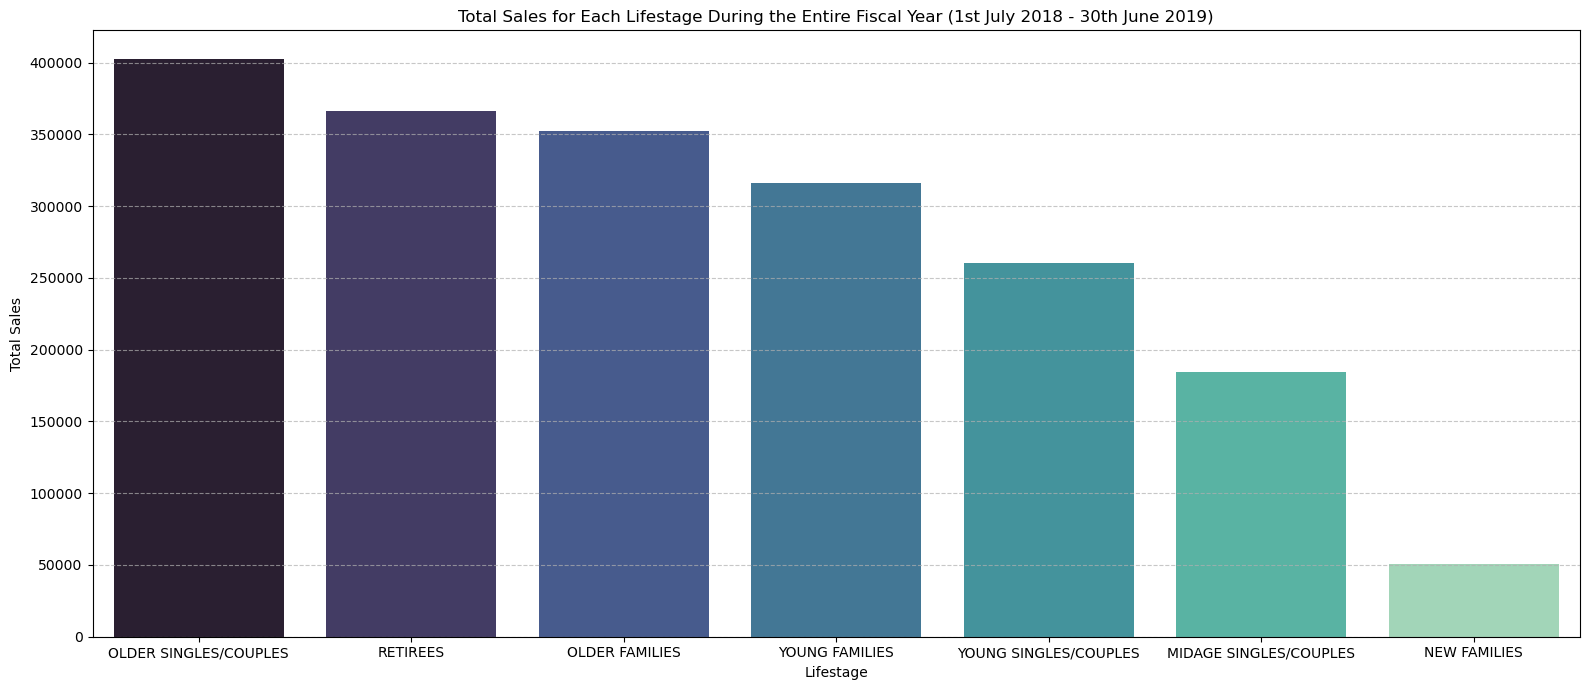

In [61]:
#   Plotting a bar graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(16, 7))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", data=customer_sales, palette="mako")
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It seems like OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least. Interestingly, we can see a decreasing trend of purchases according to age in the first half of the bar graph, with customers that are the most likely to spend the most time at home also having the most purchases, even though snack items wouldn't logically be associated with an age demographic.

In [43]:
lifestage_sales=dataframe.groupby(["LIFESTAGE", "DATE"])["TOT_SALES"].sum().reset_index()  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and date.
lifestage_sales=lifestage_sales[lifestage_sales["LIFESTAGE"]!="None"]   #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_sales

,LIFESTAGE,DATE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,2018-07-01,576.8
1,MIDAGE SINGLES/COUPLES,2018-07-02,589.5
2,MIDAGE SINGLES/COUPLES,2018-07-03,482.2
3,MIDAGE SINGLES/COUPLES,2018-07-04,604.5
4,MIDAGE SINGLES/COUPLES,2018-07-05,531.6
...,...,...,...
2544,YOUNG SINGLES/COUPLES,2019-06-26,687.4
2545,YOUNG SINGLES/COUPLES,2019-06-27,743.4
2546,YOUNG SINGLES/COUPLES,2019-06-28,840.7
2547,YOUNG SINGLES/COUPLES,2019-06-29,924.5


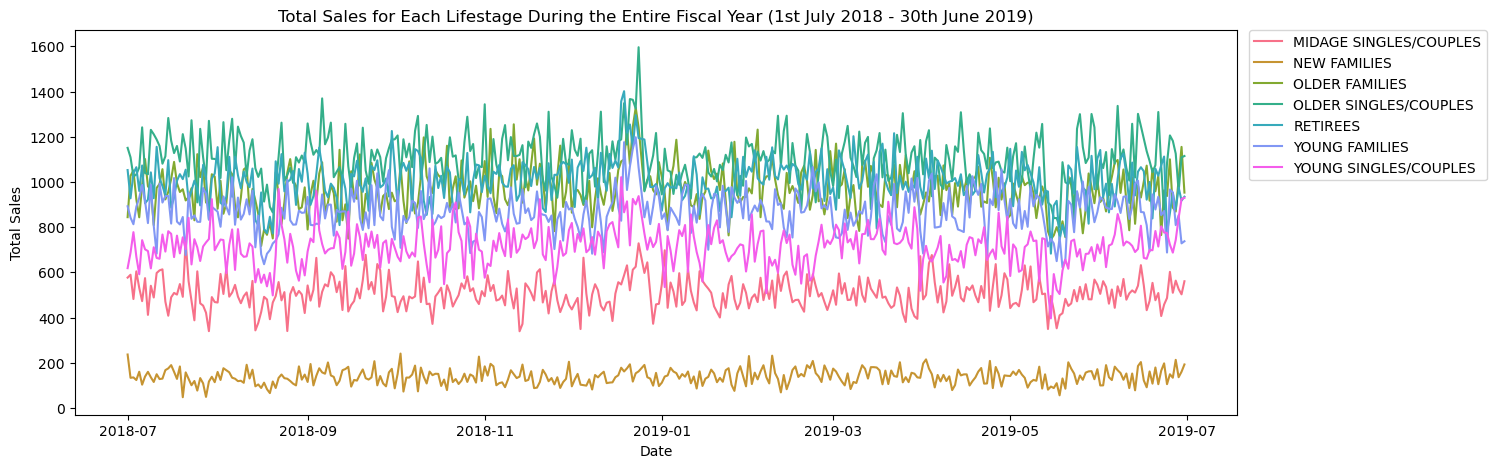

In [58]:
#   Plotting a multi-line graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(15, 5))
sns.set_palette(sns.dark_palette("#FFC107", n_colors=4))
sns.lineplot(x="DATE", y="TOT_SALES", hue="LIFESTAGE", data=lifestage_sales)
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

Like the holiday season statistics, we can see an increase in sales right before Christmas Day for all age demographics, except NEW FAMILIES, which remains consistent throughout the entire recorded duration. As new families are more inclined toward their careers and developing their newly established home, it's unlikely for them to spend on snack items frequently.

Let's see what sort of purchase behaviour each age demographic has!

In [45]:
lifestage_segment=dataframe.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False]) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and customer segment, and sorting it in descending order of the TOT_SALES column.
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"] #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_segment=lifestage_segment.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
1,MIDAGE SINGLES/COUPLES,Premium,58432.65
2,MIDAGE SINGLES/COUPLES,Budget,35514.80
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


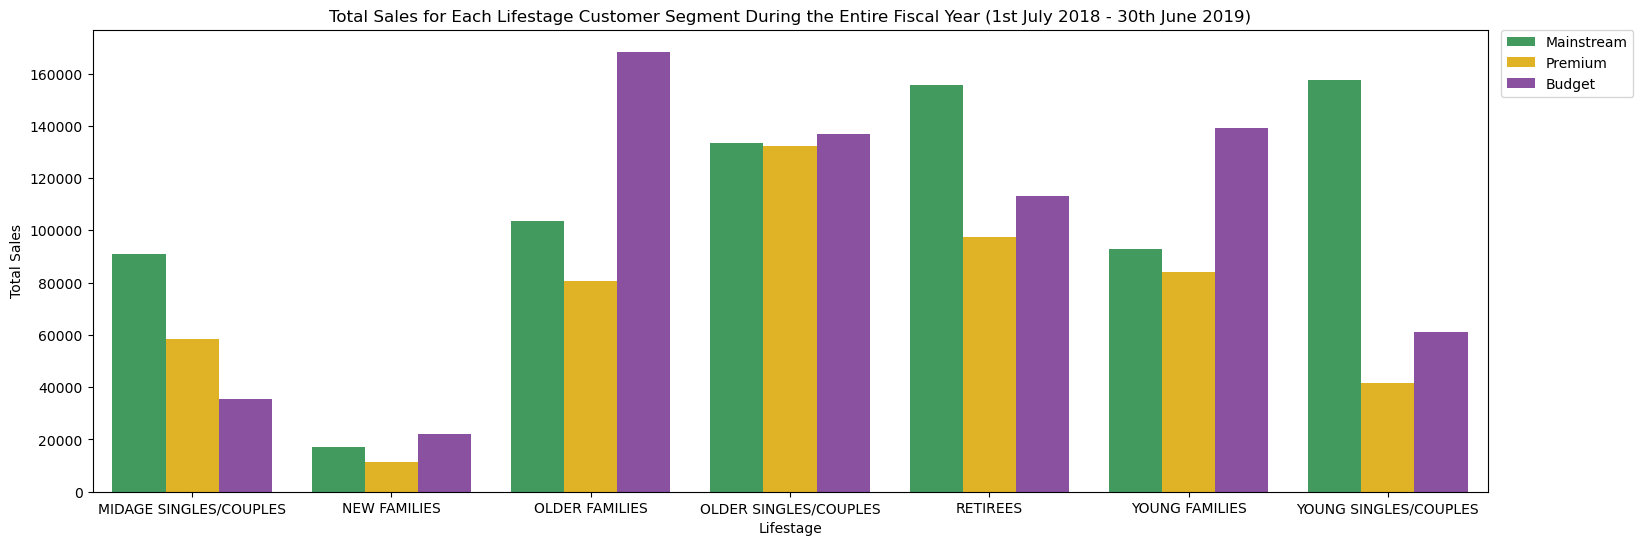

In [55]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer during the entire recorded duration.


plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=lifestage_segment, palette=sns.set_palette(sns.color_palette(["#34A85A", "#FFC107", "#8E44AD", "#2ECC71"]))
)
plt.title("Total Sales for Each Lifestage Customer Segment During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [47]:
lifestage_brands=dataframe.groupby(["LIFESTAGE", "BRAND_NAME", "PREMIUM_CUSTOMER", "PROD_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and brand, and sorting it in descending order of the TOT_SALES column.
lifestage_brands=lifestage_brands[lifestage_brands["LIFESTAGE"]!="None"]    #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_brands=lifestage_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
midage=lifestage_brands[lifestage_brands["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]    #   Storing the entries for MIDAGE SINGLES/COUPLES into a separate pandas.DataFrame.
midage

,LIFESTAGE,BRAND_NAME,PREMIUM_CUSTOMER,PROD_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,175,10557.0
1,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,150,8381.2
2,MIDAGE SINGLES/COUPLES,Pringles,Mainstream,134,8177.0
3,MIDAGE SINGLES/COUPLES,Kettle,Premium,175,5815.8
4,MIDAGE SINGLES/COUPLES,Pringles,Premium,134,5538.9
...,...,...,...,...,...
133,MIDAGE SINGLES/COUPLES,Snbts,Mainstream,90,120.7
134,MIDAGE SINGLES/COUPLES,Cheezels,Budget,125,105.0
135,MIDAGE SINGLES/COUPLES,Sunbites,Mainstream,90,103.7
136,MIDAGE SINGLES/COUPLES,Sunbites,Budget,90,96.9


With this, we can see that MIDAGE SINGLES/COUPLES prefer KETTLE® and 175 gramme package size the most in both the Mainstream and Premium customer segment.

### Recency, Frequency and Monetary (RFM) Analysis:
Recency, Frequency and Monetary (RFM) analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. This can help us identify customers who are most valuable to the store, as well as those who may be at risk of churning.

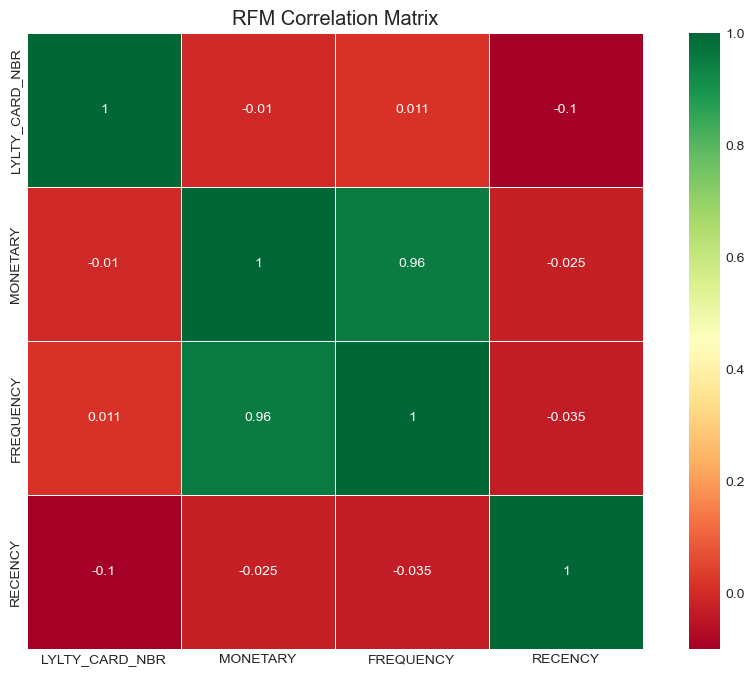

In [86]:
#   Creating a new pandas.DataFrame with the Recency, Frequency and Monetary (RFM) values for each customer based on the LYLTY_CARD_NBR.

rfm=dataframe.groupby("LYLTY_CARD_NBR")["TOT_SALES"].agg(["sum", "count"]).reset_index()    #   Grouping the pandas.DataFrame by the TOT_SALES column for each customer, and aggregating the sum and count.
rfm.columns=["LYLTY_CARD_NBR", "MONETARY", "FREQUENCY"] #   Renaming the columns of the pandas.DataFrame.
rfm["RECENCY"]=(datetime.datetime.strptime("2019-06-30", "%Y-%m-%d")-dataframe.groupby("LYLTY_CARD_NBR")["DATE"].max()).dt.days #   Calculating the Recency value for each customer.
rfm=rfm.dropna()    #   Dropping the null values from the pandas.DataFrame.
rfm=rfm.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rfm.corr(), annot=True, cmap="RdYlGn", square=True, linewidths=0.5, linecolor="white")
plt.title("RFM Correlation Matrix")
plt.show()

From the Recency, Frequency and Monetary (RFM) analysis, there don't seem to be many customers at risk of churning, but the scatter graph does suggest that the oldest customers may be most valuable to the store and the recent ones may likely be at risk of churning.

# Insights from Sales Data Analysis

## Holiday Season Sales

* Sales gradually increase during the holiday season, peaking on **December 24th**, and then drop suddenly after Christmas Day.
* Ideal time for **promotional campaigns or discounts** is during this period.

## Product Sales

* **380g package size** is the highest-selling during the holiday season.
* **KETTLE®** is the highest-selling brand during both the holiday season and the entire year.
* **175g package size** is the highest-selling on average throughout the year, with a significant lead (**37%**) over the second highest-selling size.

## Customer Loyalty

* **OLDER SINGLES/COUPLES** are the most loyal customers.
* **NEW FAMILIES** are the least loyal customers.

## Customer Purchasing Behavior

* **MIDAGE SINGLES/COUPLES**:
	+ Have the highest **Mainstream and Premium purchases**.
	+ Prefer **KETTLE® and 175g package size** in both Mainstream and Premium segments.

## Customer Value

* Oldest customers may be the most **valuable** to the store.
* Recent customers may be at risk of **churning**.